In [1]:
import pandas as pd   
import matplotlib.pyplot as plt
import plotly.express as px
import time
import numpy as np
import warnings


from sklearn.pipeline import Pipeline
from matplotlib import pyplot
# the permutation based importance
import seaborn as sns

from numpy import mean
import warnings
warnings.filterwarnings("ignore") 

In [2]:
# Importing Dataset using Pandas.
data = pd.read_csv("E:/sales_data.csv")
data.shape  

(811, 107)

In [3]:
data.head()

,Product_Code,W0,W1,W2,W3,W4,W5,W6,W7,W8,...,Normalized 42,Normalized 43,Normalized 44,Normalized 45,Normalized 46,Normalized 47,Normalized 48,Normalized 49,Normalized 50,Normalized 51
0,P1,11,12,10,8,13,12,14,21,6,...,0.06,0.22,0.28,0.39,0.50,0.00,0.22,0.17,0.11,0.39
1,P2,7,6,3,2,7,1,6,3,3,...,0.20,0.40,0.50,0.10,0.10,0.40,0.50,0.10,0.60,0.00
2,P3,7,11,8,9,10,8,7,13,12,...,0.27,1.00,0.18,0.18,0.36,0.45,1.00,0.45,0.45,0.36
3,P4,12,8,13,5,9,6,9,13,13,...,0.41,0.47,0.06,0.12,0.24,0.35,0.71,0.35,0.29,0.35
4,P5,8,5,13,11,6,7,9,14,9,...,0.27,0.53,0.27,0.60,0.20,0.20,0.13,0.53,0.33,0.40


In [6]:
data.dtypes

Product_Code      object
W0                 int64
W1                 int64
W2                 int64
W3                 int64
                  ...   
Normalized 47    float64
Normalized 48    float64
Normalized 49    float64
Normalized 50    float64
Normalized 51    float64
Length: 107, dtype: object

In [9]:
data.info

<bound method DataFrame.info of     Product_Code  W0  W1  W2  W3  W4  W5  W6  W7  W8  ...  Normalized 42  \
0             P1  11  12  10   8  13  12  14  21   6  ...           0.06   
1             P2   7   6   3   2   7   1   6   3   3  ...           0.20   
2             P3   7  11   8   9  10   8   7  13  12  ...           0.27   
3             P4  12   8  13   5   9   6   9  13  13  ...           0.41   
4             P5   8   5  13  11   6   7   9  14   9  ...           0.27   
..           ...  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...            ...   
806         P815   0   0   1   0   0   2   1   0   0  ...           0.00   
807         P816   0   1   0   0   1   2   2   6   0  ...           0.43   
808         P817   1   0   0   0   1   1   2   1   1  ...           0.50   
809         P818   0   0   0   1   0   0   0   0   1  ...           0.00   
810         P819   0   1   0   0   0   0   0   0   0  ...           0.00   

     Normalized 43  Normalized 44  Normalized 45  Norma

In [10]:
data.isnull().sum()

Product_Code     0
W0               0
W1               0
W2               0
W3               0
                ..
Normalized 47    0
Normalized 48    0
Normalized 49    0
Normalized 50    0
Normalized 51    0
Length: 107, dtype: int64

In [15]:
data.drop('Product_Code',axis=1,inplace=True)

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaling = MinMaxScaler()

scaling.fit(data)
data_scaled = scaling.transform(data)

In [19]:
data_scaled = pd.DataFrame(data_scaled, columns= data.columns)

## Cluster Analysis

### Mini Batch Kmean Model

In [20]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics.cluster import fowlkes_mallows_score
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics.cluster import normalized_mutual_info_score
from sklearn.metrics import v_measure_score
from sklearn.metrics import homogeneity_score

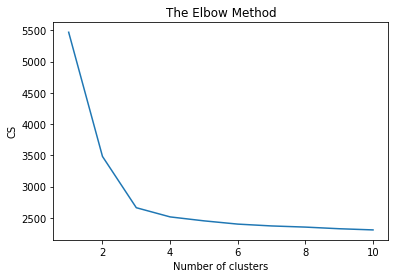

In [21]:
# Use elbow method to find optimal number of clusters

cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(data_scaled)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

In [22]:

kMeans = MiniBatchKMeans(n_clusters=3, random_state=0, batch_size=6)
data_scaled["Cluster"] = kMeans.fit_predict(data_scaled)

In [23]:
labels_pred = data_scaled["Cluster"]

In [24]:
score = silhouette_score(data_scaled, kmeans.labels_, metric='euclidean')
print("Silhouetter Score is:", score)
print("--------------------------------------------------------------")

db_index = davies_bouldin_score(data_scaled, data_scaled["Cluster"] )
print("DB Index (Davies-Bouldin index) is :", db_index)
print("--------------------------------------------------------------")

Silhouetter Score is: 0.04111730528445635
--------------------------------------------------------------
DB Index (Davies-Bouldin index) is : 1.1060880724949638
--------------------------------------------------------------


### Aglomorative Model

In [25]:
from sklearn.cluster import AgglomerativeClustering
clustering_model = AgglomerativeClustering(n_clusters=6, linkage="ward")
data_scaled["Cluster"] = clustering_model.fit_predict(data_scaled)

In [26]:
score = silhouette_score(data_scaled, kmeans.labels_, metric='euclidean')
print("Silhouetter Score is:", score)
print("--------------------------------------------------------------")

db_index = davies_bouldin_score(data_scaled, data_scaled["Cluster"] )
print("DB Index (Davies-Bouldin index) is :", db_index)
print("--------------------------------------------------------------")

Silhouetter Score is: 0.05247111135874542
--------------------------------------------------------------
DB Index (Davies-Bouldin index) is : 1.3888480016705078
--------------------------------------------------------------


### DBSCAN

In [29]:
from sklearn.cluster import DBSCAN
epsilon = 2.0
min_samples = 13

labels = DBSCAN(eps=epsilon, min_samples=min_samples).fit_predict(data_scaled)

In [30]:
score = silhouette_score(data_scaled, labels, metric='euclidean')
print("Silhouetter Score is:", score)
print("--------------------------------------------------------------")

db_index = davies_bouldin_score(data_scaled, data_scaled["Cluster"] )
print("DB Index (Davies-Bouldin index) is :", db_index)
print("--------------------------------------------------------------")

Silhouetter Score is: 0.15557269948002023
--------------------------------------------------------------
DB Index (Davies-Bouldin index) is : 1.3888480016705078
--------------------------------------------------------------


### OPTICS

In [31]:
from sklearn.cluster import OPTICS

labels = OPTICS(min_samples=3).fit_predict(data_scaled)

In [32]:
score = silhouette_score(data_scaled, labels, metric='euclidean')
print("Silhouetter Score is:", score)
print("--------------------------------------------------------------")

db_index = davies_bouldin_score(data_scaled, data_scaled["Cluster"] )
print("DB Index (Davies-Bouldin index) is :", db_index)
print("--------------------------------------------------------------")

Silhouetter Score is: -0.319489771260781
--------------------------------------------------------------
DB Index (Davies-Bouldin index) is : 1.3888480016705078
--------------------------------------------------------------


### Mean Shift

In [33]:
from sklearn.cluster import MeanShift

labels = MeanShift().fit_predict(data_scaled)

In [34]:
score = silhouette_score(data_scaled, kmeans.labels_, metric='euclidean')
print("Silhouetter Score is:", score)
print("--------------------------------------------------------------")

db_index = davies_bouldin_score(data_scaled, data_scaled["Cluster"] )
print("DB Index (Davies-Bouldin index) is :", db_index)
print("--------------------------------------------------------------")

Silhouetter Score is: 0.05247111135874542
--------------------------------------------------------------
DB Index (Davies-Bouldin index) is : 1.3888480016705078
--------------------------------------------------------------
